In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Evaluation of Diffusion Images Ratings

In [4]:
df = pd.read_excel('../data/Diffusion_Images_Ratings.xlsx')

In [5]:
view_cols = ['5_views', '13_views', '21_views']
sim_cols = ['5_sim_mean', '13_sim_mean', '21_sim_mean']

print(df.head(), '\n')
print(df.describe(), '\n')

    Name   PSNR  Prompt  5_views  13_views  21_views  5_sim_mean  5_sim_std  \
0    Can  25.16   Angel      1.5       2.5       2.0    0.264922   0.009398   
1    Can  25.16    Hero      3.0       3.5       4.0    0.347231   0.059330   
2    Can  25.16    Jedi      2.5       3.5       4.0    0.311460   0.026093   
3    Can  25.16  Normal      1.5       2.0       2.0    0.391321   0.032107   
4  Denis  24.38   Angel      1.0       1.5       2.0    0.257112   0.030962   

   13_sim_mean  13_sim_std  21_sim_mean  21_sim_std  
0     0.320062    0.013881     0.420211    0.037782  
1     0.413000    0.021619     0.455940    0.018479  
2     0.340048    0.034958     0.315775    0.025385  
3     0.515681    0.014782     0.582122    0.011798  
4     0.280330    0.023620     0.293940    0.020928   

            PSNR    5_views   13_views   21_views  5_sim_mean  5_sim_std  \
count  28.000000  28.000000  28.000000  28.000000   28.000000  28.000000   
mean   23.664286   2.750000   2.821429   3.4285

## Qualitative User Ratings

Mittlere Bewertung je View-Count:
 5_views     2.750000
13_views    2.821429
21_views    3.428571
dtype: float64 

Standardabweichung je View-Count:
 5_views     1.336801
13_views    0.973865
21_views    1.168366
dtype: float64 



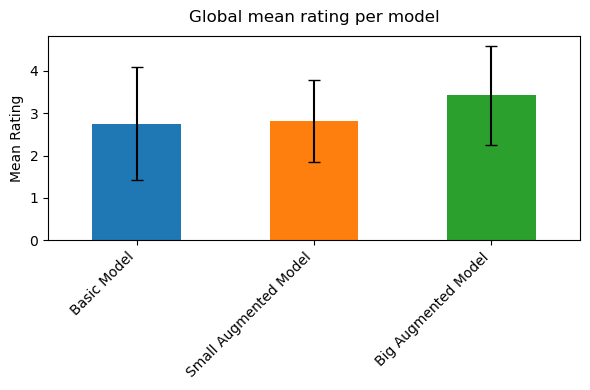

In [6]:
mean_views = df[view_cols].mean()

std_views = df[view_cols].std(ddof=1)

print("Mittlere Bewertung je View-Count:\n", mean_views, "\n")
print("Standardabweichung je View-Count:\n", std_views, "\n")

labels = ['Basic Model', 'Small Augmented Model', 'Big Augmented Model']
mean_views.index = labels
std_views.index  = labels

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

ax = mean_views.plot.bar(
        figsize=(6, 4),
        yerr=std_views,
        capsize=4,
        color=default_colors,
        ecolor='black',
        legend=False)

ax.set_title('Global mean rating per model', fontsize=12, pad=10)
ax.set_ylabel('Mean Rating')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

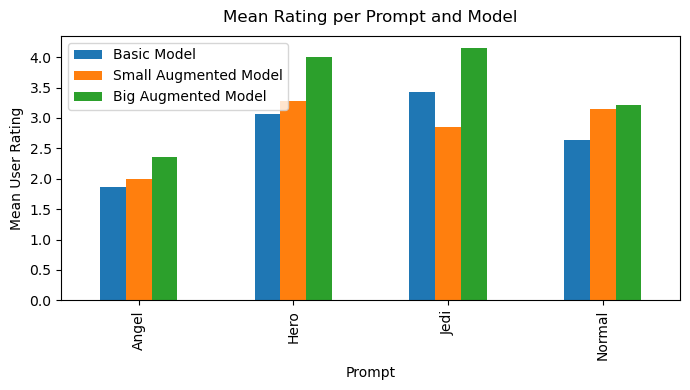

In [ ]:

mean_by_prompt = df.groupby('Prompt')[view_cols].mean()

'''# 2) Rename columns for clarity in English
mean_by_prompt = mean_by_prompt.rename(columns={
    '5_views': 'Basic Model',
    '13_views': 'Small Augmented Model',
    '21_views': 'Big Augmented Model'
})'''

ax = mean_by_prompt.plot.bar(figsize=(7, 4))
ax.set_title('Mean Rating per Prompt and Model', fontsize=12, pad=10)
ax.set_ylabel('Mean User Rating')
ax.set_xlabel('Prompt')
plt.tight_layout()
plt.show()

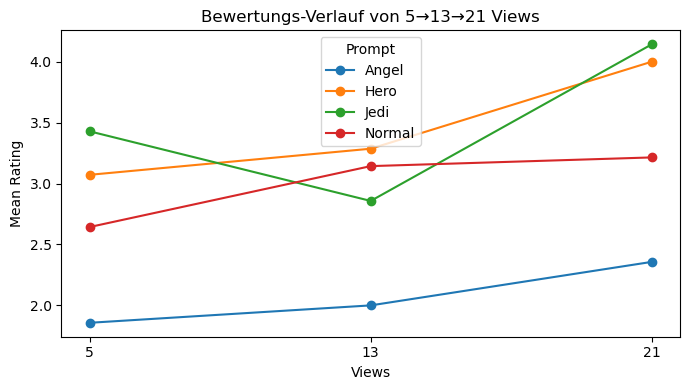

In [7]:
mean_by_prompt[view_cols].T.plot(marker='o', figsize=(7,4))
plt.title('Bewertungs-Verlauf von 5→13→21 Views')
plt.ylabel('Mean Rating')
plt.xlabel('Views')
plt.xticks([0,1,2], ['5','13','21'])
plt.legend(title='Prompt')
plt.tight_layout()
plt.show()

In [8]:
prompt_means = mean_by_prompt.copy()
prompt_means['chg_5_13']  = (prompt_means['13_views'] - prompt_means['5_views'])  / prompt_means['5_views']  * 100
prompt_means['chg_13_21'] = (prompt_means['21_views'] - prompt_means['13_views']) / prompt_means['13_views'] * 100
prompt_means['chg_5_21'] = (prompt_means['21_views'] - prompt_means['5_views']) / prompt_means['5_views'] * 100
chg_stats = prompt_means[['chg_5_13','chg_13_21', 'chg_5_21']]
print("Ø %-Veränderung der Durchschnitte pro Prompt (5→13, 13→21, 5→21):\n", chg_stats, '\n')

Ø %-Veränderung der Durchschnitte pro Prompt (5→13, 13→21, 5→21):
          chg_5_13  chg_13_21   chg_5_21
Prompt                                 
Angel    7.692308  17.857143  26.923077
Hero     6.976744  21.739130  30.232558
Jedi   -16.666667  45.000000  20.833333
Normal  18.918919   2.272727  21.621622 



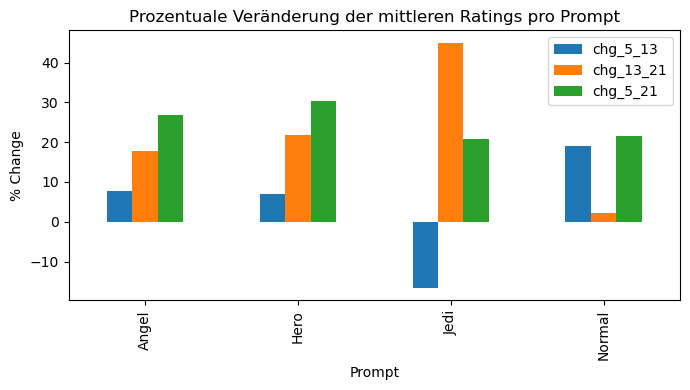

In [9]:
chg_stats.plot.bar(figsize=(7,4))
plt.title('Prozentuale Veränderung der mittleren Ratings pro Prompt')
plt.ylabel('% Change')
plt.xlabel('Prompt')
plt.tight_layout()
plt.show()

In [61]:
import scipy.stats as st

pairs = [
    ('5_views', '13_views'),
    ('13_views', '21_views'),
    ('5_views', '21_views')
]

alpha = 0.05

for a, b in pairs:
    w, p = st.wilcoxon(df[a], df[b], alternative='less')
    sig = "signifikant" if p < alpha else "n.s."
    print(f"{a} vs. {b}: W={w:.2f}, p={p:.4f} → {sig}")


5_views vs. 13_views: W=109.00, p=0.4098 → n.s.
13_views vs. 21_views: W=33.00, p=0.0006 → signifikant
5_views vs. 21_views: W=40.00, p=0.0040 → signifikant


## Quantitative Cosinus Similarity

Mittlere Bewertung je View-Count:
 5_sim_mean     0.331120
13_sim_mean    0.332462
21_sim_mean    0.355936
dtype: float64 

Standardabweichung je View-Count:
 5_sim_mean     0.100955
13_sim_mean    0.134046
21_sim_mean    0.103806
dtype: float64 



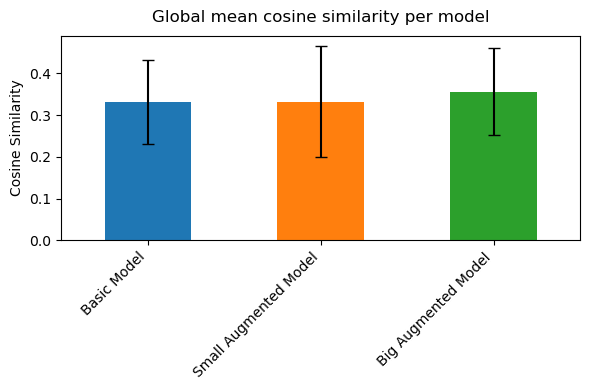

In [8]:
mean_views = df[sim_cols].mean()

std_views = df[sim_cols].std(ddof=1)

print("Mittlere Bewertung je View-Count:\n", mean_views, "\n")
print("Standardabweichung je View-Count:\n", std_views, "\n")

labels = ['Basic Model', 'Small Augmented Model', 'Big Augmented Model']
mean_views.index = labels
std_views.index  = labels

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

ax = mean_views.plot.bar(
        figsize=(6, 4),
        yerr=std_views,
        capsize=4,       
        color=default_colors,
        ecolor='black',
        legend=False)

ax.set_title('Global mean cosine similarity per model', fontsize=12, pad=10)
ax.set_ylabel('Cosine Similarity')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

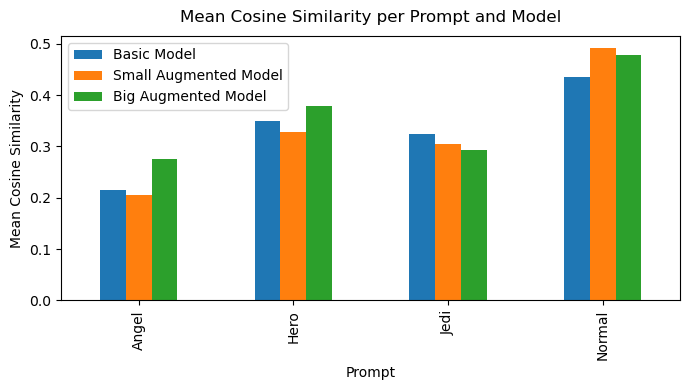

In [ ]:

mean_by_prompt = df.groupby('Prompt')[sim_cols].mean()

'''# 2) Rename columns for clarity in English
mean_by_prompt = mean_by_prompt.rename(columns={
    '5_sim_mean': 'Basic Model',
    '13_sim_mean': 'Small Augmented Model',
    '21_sim_mean': 'Big Augmented Model'
})'''

ax = mean_by_prompt.plot.bar(figsize=(7, 4))
ax.set_title('Mean Cosine Similarity per Prompt and Model', fontsize=12, pad=10)
ax.set_ylabel('Mean Cosine Similarity')
ax.set_xlabel('Prompt')
plt.tight_layout()
plt.show()

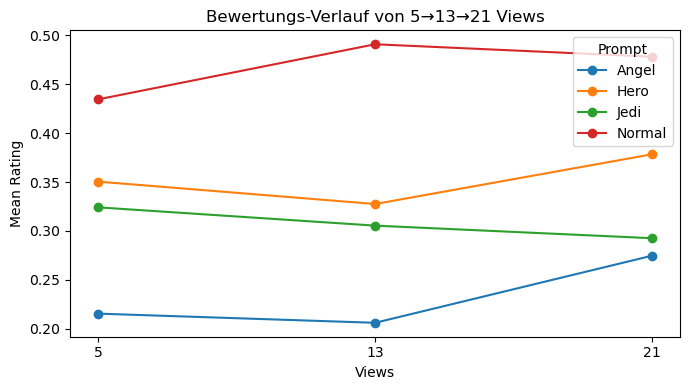

In [34]:
mean_by_prompt[sim_cols].T.plot(marker='o', figsize=(7,4))
plt.title('Bewertungs-Verlauf von 5→13→21 Views')
plt.ylabel('Mean Rating')
plt.xlabel('Views')
plt.xticks([0,1,2], ['5','13','21'])
plt.legend(title='Prompt')
plt.tight_layout()
plt.show()

In [38]:
prompt_means = mean_by_prompt.copy()
prompt_means['chg_5_13']  = (prompt_means['13_sim_mean'] - prompt_means['5_sim_mean'])  / prompt_means['5_sim_mean']  * 100
prompt_means['chg_13_21'] = (prompt_means['21_sim_mean'] - prompt_means['13_sim_mean']) / prompt_means['13_sim_mean'] * 100
prompt_means['chg_5_21'] = (prompt_means['21_sim_mean'] - prompt_means['5_sim_mean']) / prompt_means['5_sim_mean'] * 100
chg_stats = prompt_means[['chg_5_13','chg_13_21', 'chg_5_21']]
print("Ø %-Veränderung der Durchschnitte pro Prompt (5→13, 13→21, 5→21):\n", chg_stats, '\n')

Ø %-Veränderung der Durchschnitte pro Prompt (5→13, 13→21, 5→21):
          chg_5_13  chg_13_21   chg_5_21
Prompt                                 
Angel   -4.345491  33.276864  27.485330
Hero    -6.530893  15.524946   7.980136
Jedi    -5.767519  -4.207876  -9.732705
Normal  12.963534  -2.589587  10.038245 



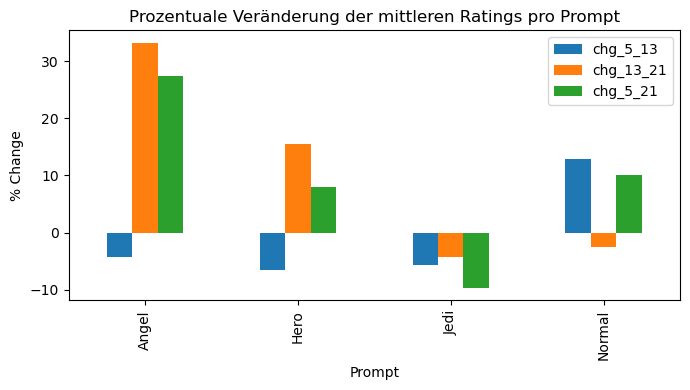

In [39]:
chg_stats.plot.bar(figsize=(7,4))
plt.title('Prozentuale Veränderung der mittleren Ratings pro Prompt')
plt.ylabel('% Change')
plt.xlabel('Prompt')
plt.tight_layout()
plt.show()

In [58]:
import scipy.stats as st

pairs = [
    ('5_sim_mean', '13_sim_mean'),
    ('13_sim_mean', '21_sim_mean'),
    ('5_sim_mean', '21_sim_mean')
]

alpha = 0.05

for a, b in pairs:
    w, p = st.wilcoxon(df[a], df[b], alternative='less')
    sig = "signifikant" if p < alpha else "n.s."
    print(f"{a} vs. {b}: W={w:.2f}, p={p:.4f} → {sig}")


5_sim_mean vs. 13_sim_mean: W=171.00, p=0.2395 → n.s.
13_sim_mean vs. 21_sim_mean: W=157.00, p=0.1526 → n.s.
5_sim_mean vs. 21_sim_mean: W=150.00, p=0.1180 → n.s.


## Tests mit PSNR und Korrelation

In [65]:
person_stats = df.groupby('Name').agg({
    'PSNR': 'first',
    '5_views': 'mean',
    '13_views': 'mean',
    '21_views': 'mean'
}).rename(columns={'5_views':'m5','13_views':'m13','21_views':'m21'})
person_stats['chg_5_13']  = (person_stats['m13'] - person_stats['m5'])  / person_stats['m5']  * 100
person_stats['chg_13_21'] = (person_stats['m21'] - person_stats['m13']) / person_stats['m13'] * 100
person_stats['mean_chg']  = person_stats[['chg_5_13','chg_13_21']].mean(axis=1)

corr = person_stats[['PSNR','mean_chg']].corr().iloc[0,1]
print(f"Korrelations-Koeffizient PSNR ↔ mittlere %-Veränderung pro Person: {corr:.2f}\n")

Korrelations-Koeffizient PSNR ↔ mittlere %-Veränderung pro Person: -0.13



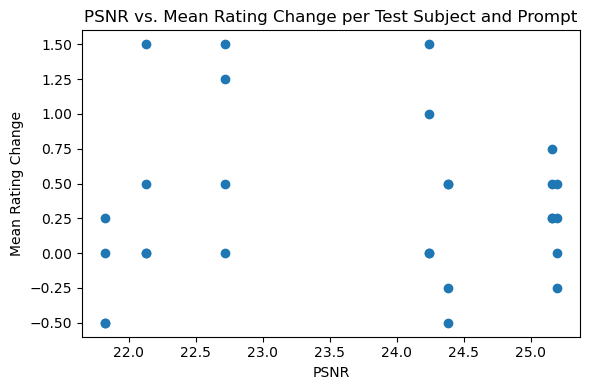

In [57]:

df['chg_5_13']  = (df['13_views'] - df['5_views']) #/ df['5_views']
df['chg_13_21'] = (df['21_views'] - df['13_views']) #/ df['13_views']
df['mean_chg']  = df[['chg_5_13', 'chg_13_21']].mean(axis=1)

plt.figure(figsize=(6,4))
plt.scatter(df['PSNR'], df['mean_chg'])
    
plt.title('PSNR vs. Mean Rating Change per Test Subject and Prompt')
plt.xlabel('PSNR')
plt.ylabel('Mean Rating Change')
plt.tight_layout()
plt.show()


Korrelations-Koeffizient PSNR ↔ mittlere %-Veränderung pro Datenpunkt: 0.25



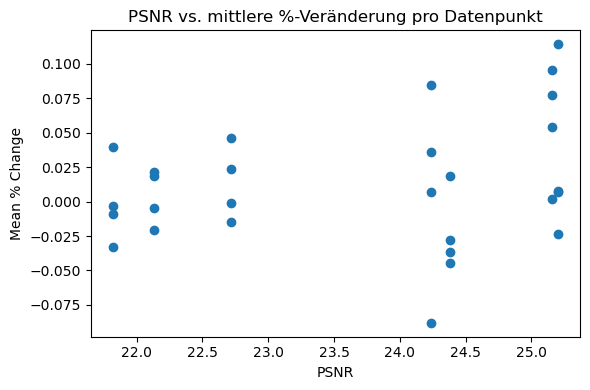

In [47]:

df['chg_5_13']  = (df['13_sim_mean'] - df['5_sim_mean'])  # / df['5_sim_mean']  * 100
df['chg_13_21'] = (df['21_sim_mean'] - df['13_sim_mean'])  #/ df['13_sim_mean'] * 100

df['mean_chg'] = df[['chg_5_13','chg_13_21']].mean(axis=1)

corr = df[['PSNR','mean_chg']].corr().iloc[0,1]
print(f"Korrelations-Koeffizient PSNR ↔ mittlere %-Veränderung pro Datenpunkt: {corr:.2f}\n")

plt.figure(figsize=(6,4))
plt.scatter(df['PSNR'], df['mean_chg'])
plt.title('PSNR vs. mittlere %-Veränderung pro Datenpunkt')
plt.xlabel('PSNR')
plt.ylabel('Mean % Change')
plt.tight_layout()
plt.show()